In [11]:
!pip install progress

In [12]:
from keras import applications
from keras import backend as K
from keras.preprocessing import image
import numpy as np
from scipy.misc import imsave
from scipy.optimize import fmin_l_bfgs_b
import matplotlib.pyplot as plt
%matplotlib inline


from progress.bar import Bar
import sys

'''
Based on the code:
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

The idea is to maximize the activations of the filters to see what the 
filters are trying to see.
'''

'\nBased on the code:\nhttps://blog.keras.io/how-convolutional-neural-networks-see-the-world.html\n\nThe idea is to maximize the activations of the filters to see what the \nfilters are trying to see.\n'

In [13]:
### Load the network, here I am looking at the VGG16 model ###
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
input_img = model.input

In [14]:
### Get all the layers and their parameters ###
layer_dict = dict([(layer.name, layer) for layer in model.layers])
for layer_name in layer_dict.keys():
    print(layer_name, layer_dict[layer_name].output_shape)

input_2 (None, None, None, 3)
block1_conv1 (None, None, None, 64)
block1_conv2 (None, None, None, 64)
block1_pool (None, None, None, 64)
block2_conv1 (None, None, None, 128)
block2_conv2 (None, None, None, 128)
block2_pool (None, None, None, 128)
block3_conv1 (None, None, None, 256)
block3_conv2 (None, None, None, 256)
block3_conv3 (None, None, None, 256)
block3_pool (None, None, None, 256)
block4_conv1 (None, None, None, 512)
block4_conv2 (None, None, None, 512)
block4_conv3 (None, None, None, 512)
block4_pool (None, None, None, 512)
block5_conv1 (None, None, None, 512)
block5_conv2 (None, None, None, 512)
block5_conv3 (None, None, None, 512)
block5_pool (None, None, None, 512)


In [15]:
### Specify size of input image ###
height = 128
width = 128

In [16]:
### Create a valid image out of the weights that can be visualized ###
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [17]:
def layer_to_visualize(layer, img_to_visualize):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    print(convolutions.shape)
    
    return convolutions
    
#     # Visualization of each filter of the layer
#     fig = plt.figure(figsize=(12,8))
#     for i in range(10):
#         ax = fig.add_subplot(n,n,i+1)
#         ax.imshow(convolutions[i], cmap='gray')

In [23]:
def plot_activations(activations):
    
    print('\n\nGenerating a plot...')
    fig = plt.figure(figsize=(25,25))
    
    height, width, n_filters = activations.shape
    shape = (height, width)

    rows = n_filters
    rows = int(np.ceil(np.sqrt(rows)))
    cols = int(np.ceil(n_filters)/rows)
    
#     print(rows, cols)

    margin = 5
    out_img = np.zeros((rows*shape[0]+(rows-1)*5, cols*shape[1]+(cols-1)*5))

    count = 0
    for i in range(rows):
#         if count > len(filter_index):
#                 break
        for j in range(cols):
            img = deprocess_image(activations[:,:,count])
            out_img[(shape[0] + margin) * i: (shape[0] + margin) * i + shape[0],
                             (shape[1] + margin) * j: (shape[1] + margin) * j + shape[1]] = img
            count += 1
#             sys.stdout.write(str(count)+' ')
#             if (count+1)%20 == 0:
#                 sys.stdout.write('\n')
#             sys.stdout.flush()
            
#             if count > len(filter_index):
#                 break

    plt.imshow(out_img, cmap='bone')
    ax = plt.gca()
    ax.grid(False)

# Visualize activations

--------------------------------------------------------------------
total 240
-rw-r--r-- 1 root root 238128 Jun 22 17:36 beach-1790049_1280.jpg
drwxr-xr-x 3 root root   4096 Jun 21 19:18 datalab
--------------------------------------------------------------------
--------------------------------------------------------------------
<class 'tensorflow.python.ops.variables.Variable'> (1, 853, 1280, 3)
--------------------------------------------------------------------


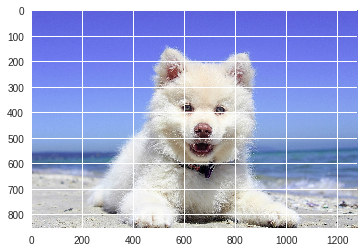

In [20]:
import urllib.request
from keras.preprocessing import image

# URL = 'http://pngimg.com/uploads/dog/dog_PNG2416.png'
URL = 'https://cdn.pixabay.com/photo/2016/11/01/23/38/beach-1790049_1280.jpg'
root_folder = '/content/'

urllib.request.urlretrieve(URL, root_folder+'beach-1790049_1280.jpg')

print('--------------------------------------------------------------------')
!ls -l /content/
print('--------------------------------------------------------------------')


img = image.load_img(root_folder+'beach-1790049_1280.jpg')
plt.imshow(img)
img_arr = np.expand_dims(np.asarray(img, dtype='float32'), axis=0)
k_img = K.variable(img_arr)
print('--------------------------------------------------------------------')
print(type(k_img), k_img.shape)
print('--------------------------------------------------------------------')


In [21]:
layer = layer_dict['block5_conv2']
activations = layer_to_visualize(layer, img_arr)
print(activations.shape)

Shape of conv: (53, 80, 512)
(53, 80, 512)
(53, 80, 512)




Generating a plot...


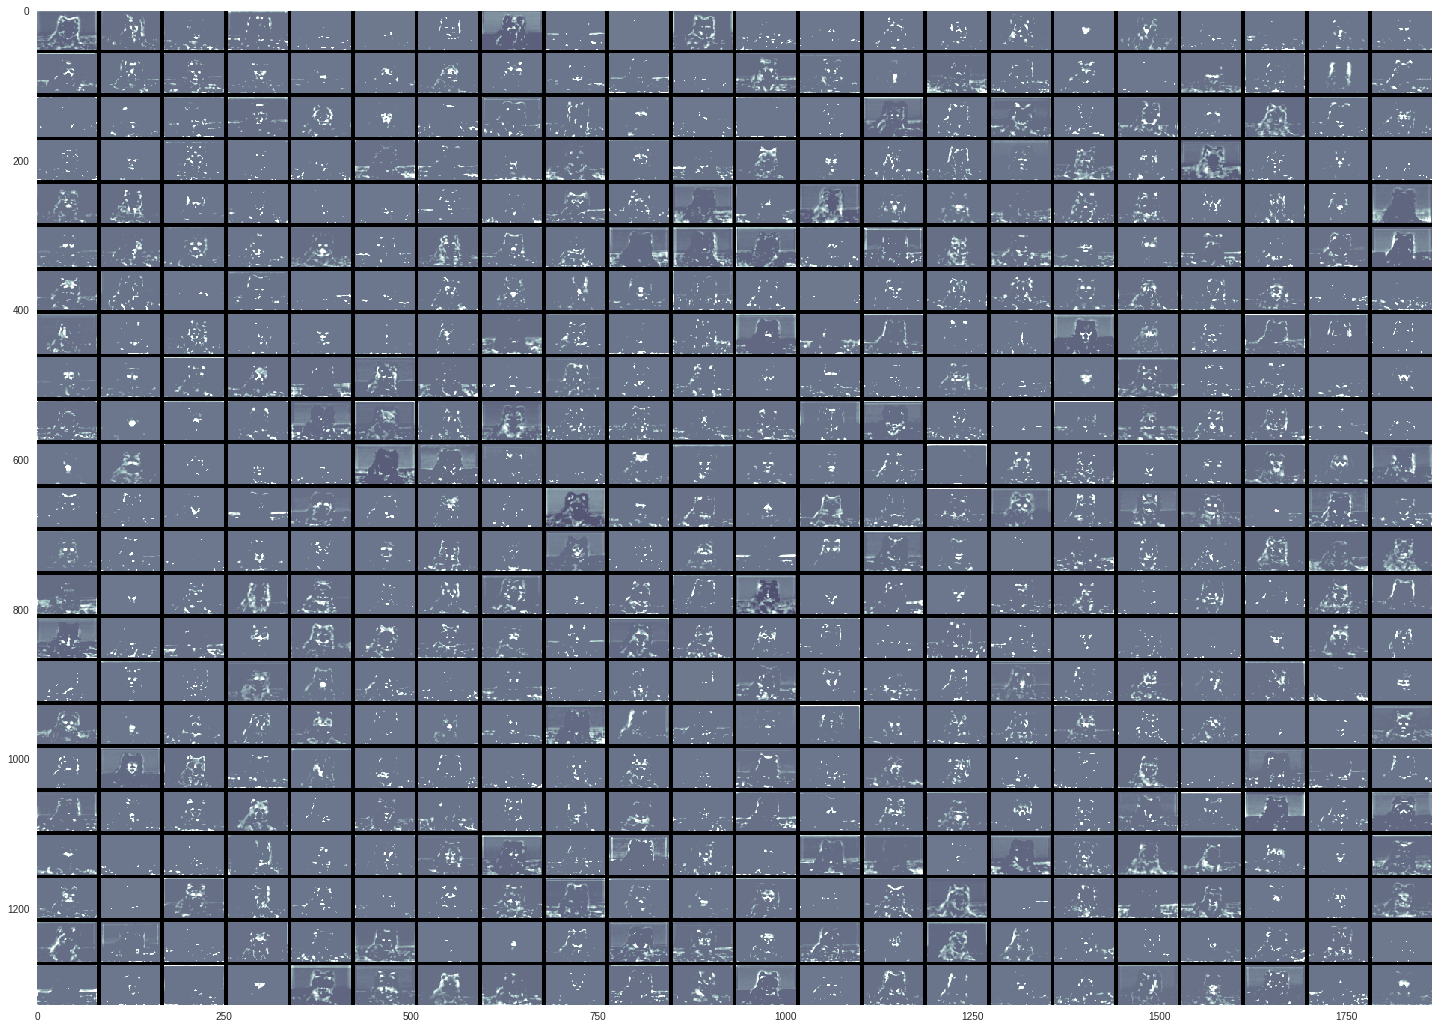

In [24]:
plot_activations(activations)